In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
df.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [10]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
# In Describe Function shows that Minimum Experience is -3 which is invalid
df['Experience']=df['Experience'].replace(-1,0)
df['Experience']=df['Experience'].replace(-2,0)
df['Experience']=df['Experience'].replace(-3,0)

# Seperating Categorical and numerical data

# Numerical value

In [12]:
column = set(df.columns)
numeric_column = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage','Personal Loan'])
numeric_column

{'Age', 'CCAvg', 'Experience', 'Income', 'Mortgage', 'Personal Loan'}

# Categorical data

In [13]:
categoric_column=list(column-numeric_column)
categoric_column

['CreditCard',
 'Family',
 'Education',
 'Online',
 'CD Account',
 'Securities Account']

In [14]:
for x in categoric_column:
    df[x]=df[x].astype('object')

In [15]:
df_cat = df.select_dtypes(include='object')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Family              5000 non-null   object
 1   Education           5000 non-null   object
 2   Securities Account  5000 non-null   object
 3   CD Account          5000 non-null   object
 4   Online              5000 non-null   object
 5   CreditCard          5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB


In [16]:
df_num = df.select_dtypes(include=['int64','float64']).drop("Personal Loan",axis=1)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         5000 non-null   int64  
 1   Experience  5000 non-null   int64  
 2   Income      5000 non-null   int64  
 3   CCAvg       5000 non-null   float64
 4   Mortgage    5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


# Skewness

Age -0.029331878574766698


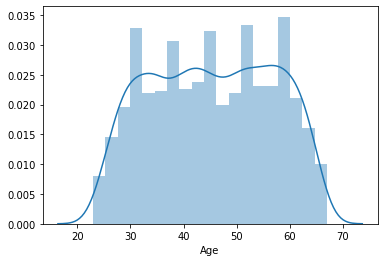

Experience -0.017215538722506932


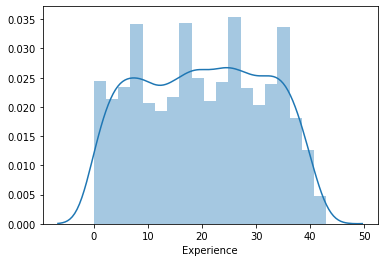

Income 0.8410861846424931


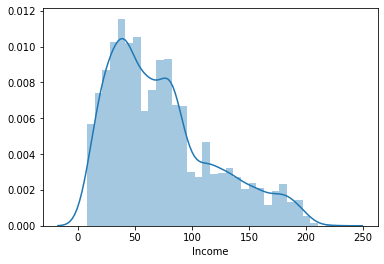

CCAvg 1.5979637637001873


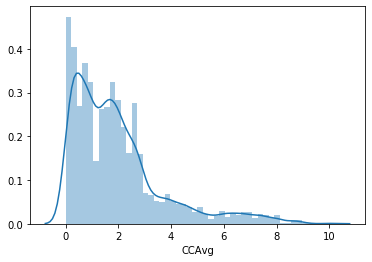

Mortgage 2.103371065804789


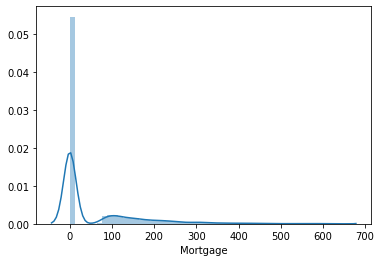

In [17]:
for col in df_num:
    print(col, skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [18]:
#Columns Income,CCAvg and Morgage having positive skewness or right skewness. so try to reduce the skewness by applying square root.

Age -0.029331878574766698


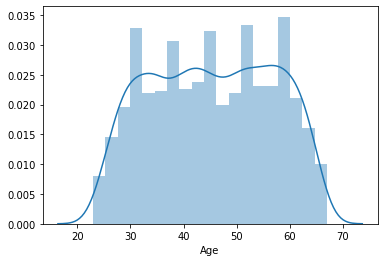

Experience -0.017215538722506932


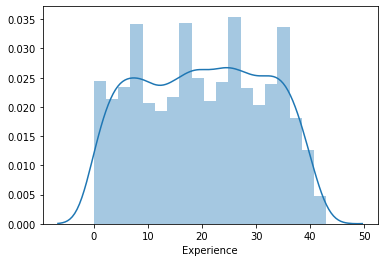

Income 0.26035759523724794


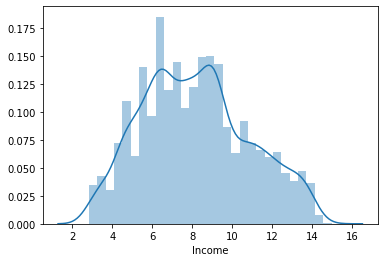

CCAvg 0.4238991859957578


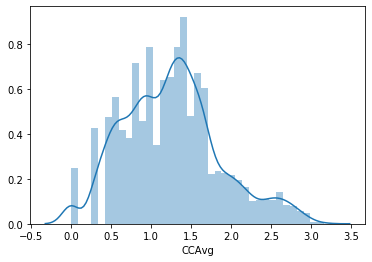

Mortgage 2.103371065804789


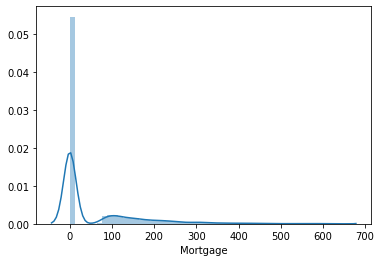

In [19]:
skew_columns = ['Income','CCAvg','Morgage']

for col in df_num:
    if col in skew_columns:
        df_num[col] = np.sqrt(df_num[col])
        print(col, skew(df_num[col]))
    else:
        print(col, skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

# Outliers

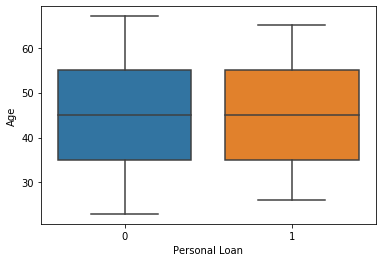

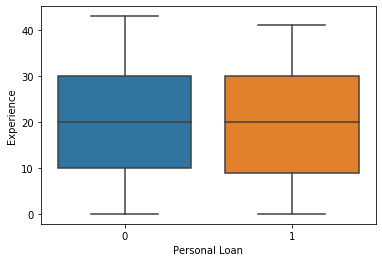

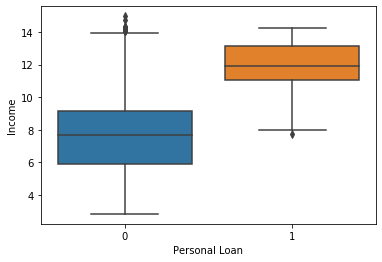

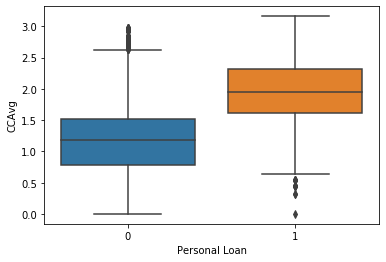

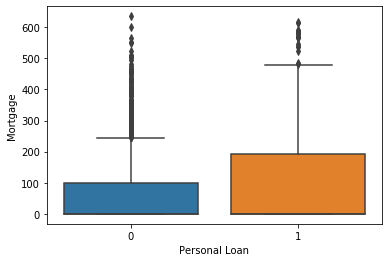

In [20]:
for col in df_num:
    plt.figure()
    sns.boxplot(df["Personal Loan"],df_num[col])
    plt.show()

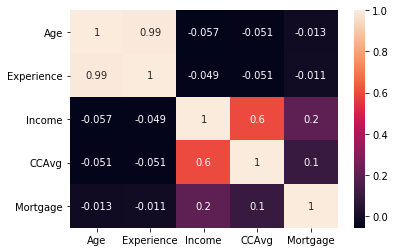

In [21]:
sns.heatmap(df_num.corr(),annot = True)
plt.show()

In [22]:
df_new = pd.concat([df_cat,df_num],axis=1)
df_new.head(5)

,Family,Education,Securities Account,CD Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage
0,4,1,1,0,0,0,25,1,7.000000,1.264911,0
1,3,1,1,0,0,0,45,19,5.830952,1.224745,0
2,1,1,0,0,0,0,39,15,3.316625,1.000000,0
3,1,2,0,0,0,0,35,9,10.000000,1.643168,0
4,4,2,0,0,0,1,35,8,6.708204,1.000000,0


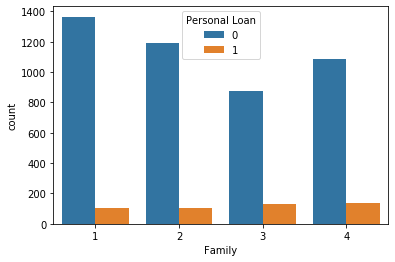

In [23]:
sns.countplot(x=df['Family'], hue=df['Personal Loan'], data=df_cat) 
plt.show()#Family size does not have any impact in personal loan.But it seems families with size of 3 are more likely to take loan. 

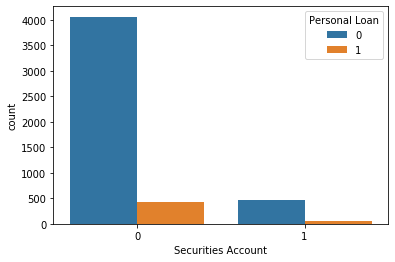

In [24]:
sns.countplot(x=df['Securities Account'], hue=df['Personal Loan'], data=df_cat) 
plt.show()#The distribution of 'CD Account' and 'Securities Account' are heavily imbalanced.Customers who does not have CD account , does not have loan as well. This seems to be majority. 
#But almost all customers who has CD account has loan as well

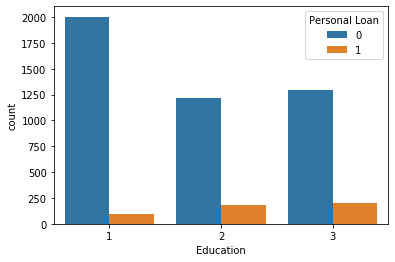

In [25]:
plt.figure()
sns.countplot(x=df['Education'], hue=df['Personal Loan'], data=df_cat) 
plt.show()

# Training Dataset and Testing Dataset

In [46]:
X = df_new
Y = df["Personal Loan"]

In [47]:
# Standardizing DataSet

for col in X:
    ss = StandardScaler()
    X[col]=ss.fit_transform(X[[col]])

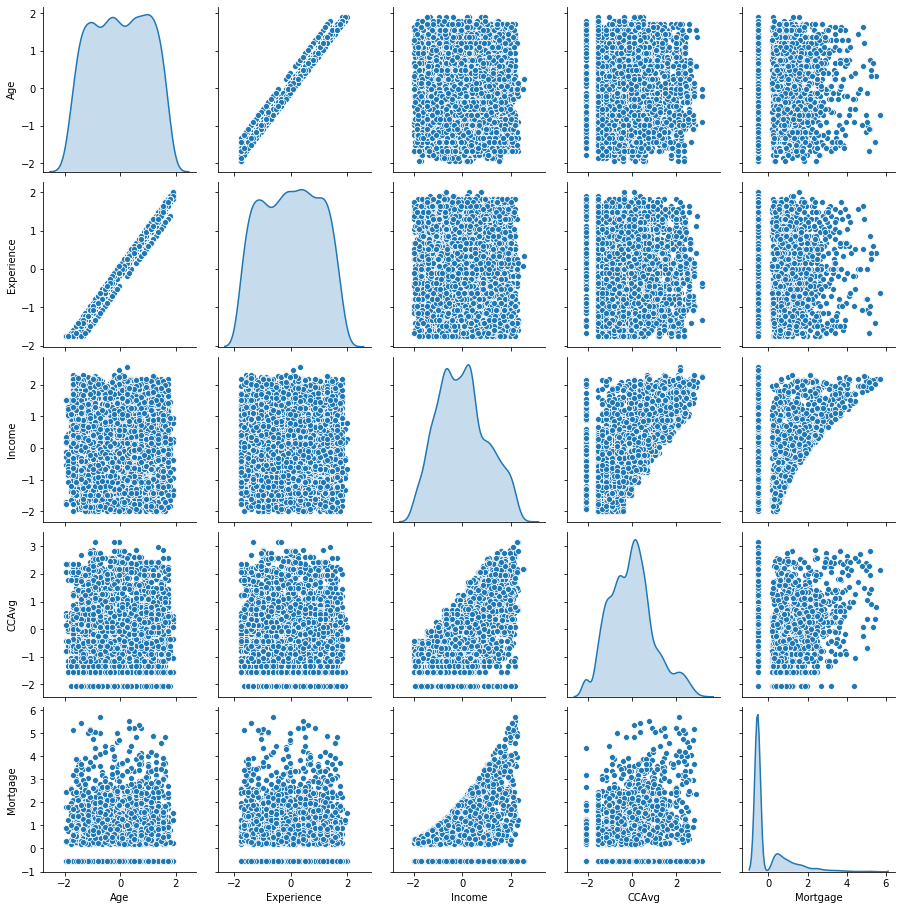

In [48]:
# All Dependent variables to see their inter-relations.
sns.pairplot(X, diag_kind = 'kde', vars = list(df_num.columns))
plt.show()


# Data Preprocessing

In [49]:
#To split into training and testing data in ratio of 70:30
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# 1.LOGISTIC REGRESSION

In [50]:
lr=LogisticRegression()

In [51]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [52]:
y_pred=lr.predict(X_test)

In [54]:
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.86      0.61      0.71       149

    accuracy                           0.95      1500
   macro avg       0.91      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500

[[1336   15]
 [  58   91]]


# 2.Decision Tree

In [70]:
dt1=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt1.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [71]:
dt1.score(X_test , Y_test)

0.972

In [72]:
y_pred = dt1.predict(X_test)

In [73]:
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1351
           1       0.91      0.79      0.85       149

    accuracy                           0.97      1500
   macro avg       0.95      0.89      0.92      1500
weighted avg       0.97      0.97      0.97      1500

[[1340   11]
 [  31  118]]


# 3.Random Forest

In [62]:
RF= RandomForestClassifier(n_estimators=200, max_depth=10)

In [64]:
RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [65]:
y_pred = RF.predict(X_test)

In [66]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.97      0.84      0.90       149

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [67]:
print(confusion_matrix(Y_test,y_pred))

[[1347    4]
 [  24  125]]


# 4.KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier(n_neighbors=9)

In [76]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [77]:
y_pred = knn.predict(X_test)

In [79]:
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1351
           1       0.95      0.50      0.65       149

    accuracy                           0.95      1500
   macro avg       0.95      0.75      0.81      1500
weighted avg       0.95      0.95      0.94      1500

[[1347    4]
 [  75   74]]


# 5.Gradient boosting

In [86]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=15)


In [87]:
gb.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=15)

In [88]:
y_pred = gb.predict(X_test)

In [89]:
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.91      0.87      0.89       149

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500

[[1338   13]
 [  19  130]]


# 6. SVM

In [90]:
from sklearn.svm import SVC

In [91]:
svc=SVC()

In [92]:
svc.fit(X_train,Y_train)

SVC()

In [94]:
y_pred=svc.predict(X_test)

In [96]:
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.95      0.72      0.82       149

    accuracy                           0.97      1500
   macro avg       0.96      0.86      0.90      1500
weighted avg       0.97      0.97      0.97      1500

[[1345    6]
 [  42  107]]


# Conclusion

# Among the 6 models that we have implemented RandomForestClassifier and GradientBoosting classifier gives the same and best F1 Score and accuracy score with almost accuracy of 98% and F1-Score of 91%